<a href="INSERT_colab_python_link" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INSERT_exercise

In [ ]:
#| label: exercise

#' @param X the feature input matrix X
#' @param y the outcome vector y
#' @param theta parameter vector for the model (2-dimensional)

# you may want to run `pip/conda install numpy==1.26.4 pandas==2.2.2 matplotlib==3.8.4 scipy==1.13.0

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

url = "https://raw.githubusercontent.com/slds-lmu/lecture_sl/refs/heads/main/exercises/data/forbes.csv"
forbes = pd.read_csv(url)

# design matrix X with intercept (all 1s) and bp column
X = np.column_stack((np.ones(len(forbes)), forbes['bp']))
y = forbes['pres'].values

#' function to represent your models via the parameter vector theta = [theta_1, theta_2]
#' @return a predicted label y_hat for x
def f(x, theta):
 
  # >>> do something <<<
  
  return y_hat 
  
		
#' @return a vector consisting of the optimal  parameter vector 
def optim_coeff(X,y):
 
  # >>> do something <<<
  
  return theta
  
 
# >>>  Do something here to check Forbes' conjecture <<<

INSERT_hint

INSERT_solution_header

INSERT_model_equation

In [2]:
#| label: model_equation

#' function to represent your models via the parameter vector theta = [theta_1, theta_2]
#' @return a predicted label y_hat for x
def f(x, theta):
  # Recall that x[1] is always 1 and x[2] is the feature value (bp)
  y_hat = theta[0] * np.exp(theta[1] * x[1]) 
  
  return y_hat


INSERT_optimal_coefficients

In [3]:
#| label: optim_coeff

#' @return a vector consisting of the optimal parameter vector 
def optim_coeff(X,y):
  #' @return the empirical risk of a parameter vector theta
  def emp_risk(theta):
    y_hat = np.array([f(x, theta) for x in X])

    return np.sum((np.log(y) - np.log(y_hat))**2)
 
  # `theta_init` can be replaced by any other theta vector 
  # satisfying the constraint theta[1]>0
  theta_init = np.array([0.4, 0.5])
  
  # theta[0] > 0, theta[1] unbounded
  bounds = [(0, None), (None, None)]
  
  result = minimize(emp_risk, 
                   theta_init, 
                   method='L-BFGS-B',
                   bounds=bounds)
  
  return result.x

# optimal coefficients
hat_theta = optim_coeff(X,y)
print(f"{hat_theta = }")

hat_theta = array([0.39999971, 0.02035366])


INSERT_checking_forbes

INSERT_visually_header

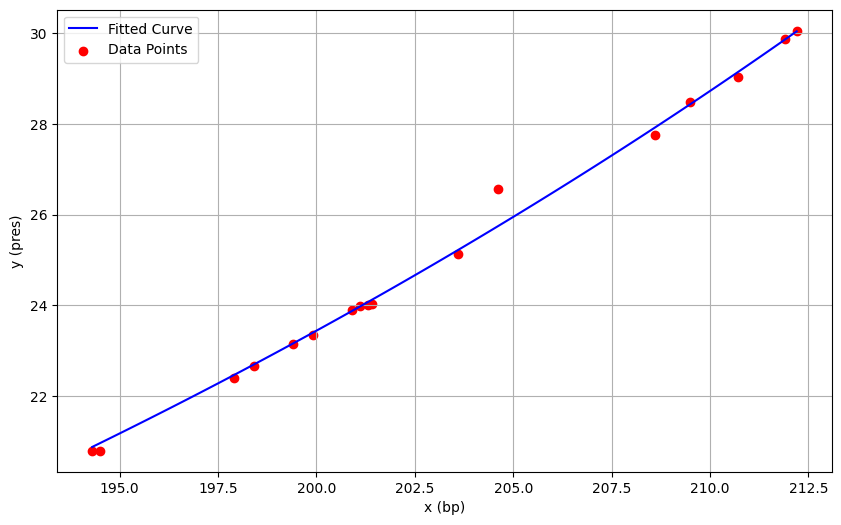

In [4]:
#| label: forbes_visually

def f_x(x, theta):
  return theta[0] * np.exp(theta[1] * x)

x_curve = np.linspace(forbes['bp'].min(), forbes['bp'].max(), 100)
y_curve = f_x(x_curve, hat_theta)

plt.figure(figsize=(10, 6))
plt.plot(x_curve, y_curve, 'b-', label='Fitted Curve')
plt.scatter(forbes['bp'], forbes['pres'], color='red', label='Data Points')
plt.xlabel('x (bp)')
plt.ylabel('y (pres)')
plt.legend()
plt.grid(True)
plt.show()

INSERT_mape_header

In [5]:
#| label: forbes_mape

def mape(X, y, theta):
  y_hat = np.array([f(x, theta) for x in X])
  perc_error = np.abs((y - y_hat)/y) * 100
  return np.mean(perc_error)

print(f"Mean Absolute Percentage Error (MAPE): {mape(X, y, hat_theta)}%")

Mean Absolute Percentage Error (MAPE): 0.4247079728944001%


INSERT_alternative_solution

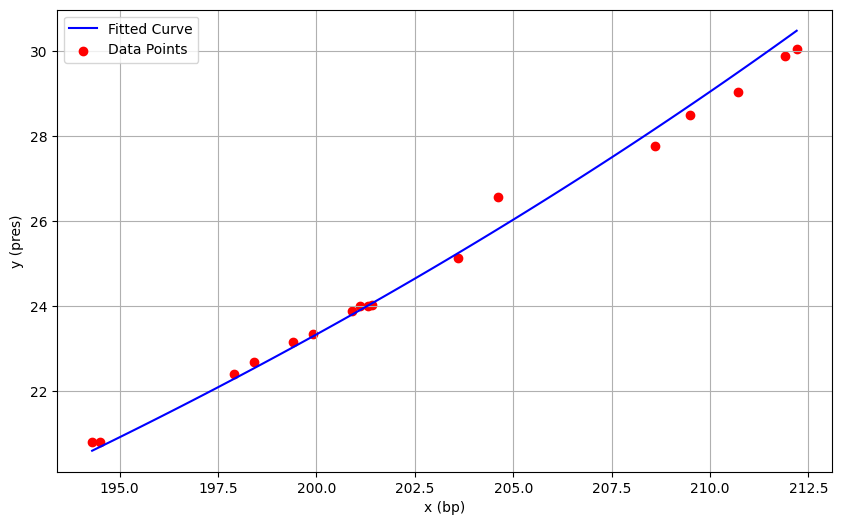

In [6]:
#| label: analytical_solution
hat_theta_2 = np.cov(forbes['bp'], np.log(forbes['pres']))[0,1] / np.var(forbes['bp'])

hat_theta_1 = np.exp(np.mean(np.log(forbes['pres'])) - hat_theta_2 * np.mean(forbes['bp']))
hat_theta = [hat_theta_1, hat_theta_2]

x_curve = np.linspace(forbes['bp'].min(), forbes['bp'].max(), 100)
y_curve = f_x(x_curve, hat_theta)

plt.figure(figsize=(10, 6))
plt.plot(x_curve, y_curve, 'b-', label='Fitted Curve')
plt.scatter(forbes['bp'], forbes['pres'], color='red', label='Data Points')
plt.xlabel('x (bp)')
plt.ylabel('y (pres)')
plt.legend()
plt.grid(True)
plt.show()

INSERT_full_code_header

hat_theta = array([0.39999971, 0.02035366])


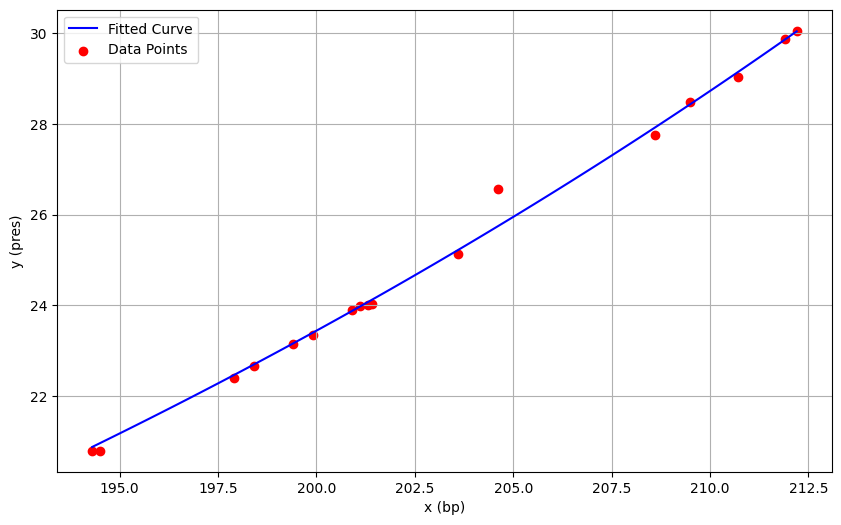

Mean Absolute Percentage Error (MAPE): 0.4247079728944001%


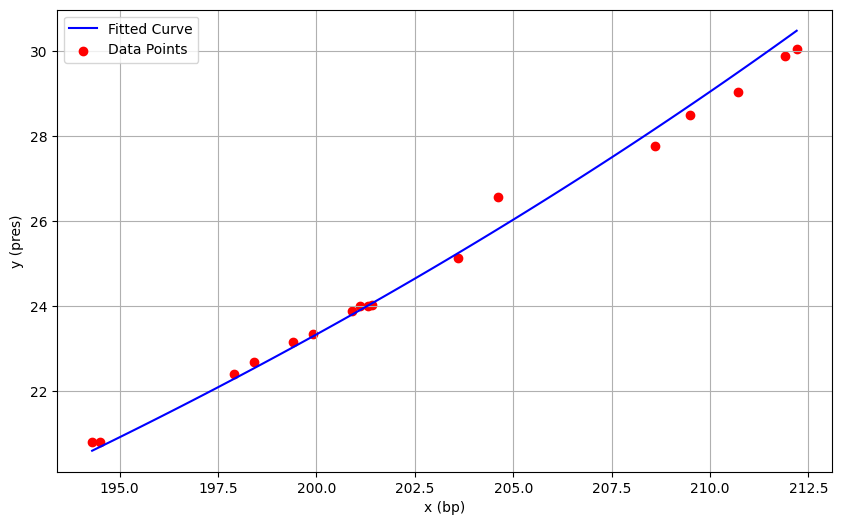

In [ ]:
#| label: full_code

#' @param X the feature input matrix X
#' @param y the outcome vector y
#' @param theta parameter vector for the model (2-dimensional)

# you may want to run `pip/conda install numpy==1.26.4 pandas==2.2.2 matplotlib==3.8.4 scipy==1.13.0

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.optimize import minimize

url = "https://raw.githubusercontent.com/slds-lmu/lecture_sl/refs/heads/main/exercises/data/forbes.csv"
forbes = pd.read_csv(url)

# design matrix X with intercept (all 1s) and bp column
X = np.column_stack((np.ones(len(forbes)), forbes['bp']))
y = forbes['pres'].values


# -------------- model_equation ---------------

#' function to represent your models via the parameter vector theta = [theta_1, theta_2]
#' @return a predicted label y_hat for x
def f(x, theta):
  # Recall that x[0] is always 1 and x[1] is the feature value (bp)
  y_hat = theta[0] * np.exp(theta[1] * x[1]) 
  
  return y_hat
		#' @return a vector consisting of the optimal parameter vector 
  
# ------------- optim_coeff ------------
def optim_coeff(X,y):
  #' @return the empirical risk of a parameter vector theta
  def emp_risk(theta):
    y_hat = np.array([f(x, theta) for x in X])

    return np.sum((np.log(y) - np.log(y_hat))**2)
 
  # `theta_init` can be replaced by any other theta vector 
  # satisfying the constraint theta[1]>0
  theta_init = np.array([0.4, 0.5])
  
  # theta[0] > 0, theta[1] unbounded
  bounds = [(0, None), (None, None)]
  
  result = minimize(emp_risk, 
                   theta_init, 
                   method='L-BFGS-B',
                   bounds=bounds)
  
  return result.x

# optimal coefficients
hat_theta = optim_coeff(X,y)
print(f"{hat_theta = }")


# ------- forbes_visually ------------

def f_x(x, theta):
  return theta[0] * np.exp(theta[1] * x)

x_curve = np.linspace(forbes['bp'].min(), forbes['bp'].max(), 100)
y_curve = f_x(x_curve, hat_theta)

plt.figure(figsize=(10, 6))
plt.plot(x_curve, y_curve, 'b-', label='Fitted Curve')
plt.scatter(forbes['bp'], forbes['pres'], color='red', label='Data Points')
plt.xlabel('x (bp)')
plt.ylabel('y (pres)')
plt.legend()
plt.grid(True)
plt.show()

# -------------- forbes_mape --------------

def mape(X, y, theta):
  y_hat = np.array([f(x, theta) for x in X])
  perc_error = np.abs((y - y_hat)/y) * 100
  return np.mean(perc_error)

print(f"Mean Absolute Percentage Error (MAPE): {mape(X, y, hat_theta)}%")

#| -------------- analytical_solution -----------
hat_theta_2 = np.cov(forbes['bp'], np.log(forbes['pres']))[0,1] / np.var(forbes['bp'])

hat_theta_1 = np.exp(np.mean(np.log(forbes['pres'])) - hat_theta_2 * np.mean(forbes['bp']))
hat_theta = [hat_theta_1, hat_theta_2]

x_curve = np.linspace(forbes['bp'].min(), forbes['bp'].max(), 100)
y_curve = f_x(x_curve, hat_theta)

plt.figure(figsize=(10, 6))
plt.plot(x_curve, y_curve, 'b-', label='Fitted Curve')
plt.scatter(forbes['bp'], forbes['pres'], color='red', label='Data Points')
plt.xlabel('x (bp)')
plt.ylabel('y (pres)')
plt.legend()
plt.grid(True)
plt.show()